# Using Machine Learning Tools 2024, Assignment 3

## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore under- or over-fitting and know what appropriate actions to take in these cases.
 

During this assignment you will go through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, and programming.


## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled dataset of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (where one training run consists of fitting a DL model, with as many epochs as you think are needed, and with fixed model specifications and fixed hyperparameter settings - that is, not including hyper-parameter optimisation). In addition, because it is intended to be for a lightweight app, your manager wants to to **limit the number of total parameters in each network to a maximum of 500,000.** Also, the data has already been double-checked for problems by an in-house data wrangling team and all erroneous data has already been identified and then fixed by the client, so you **do not need to check for erroneous data** in this case.

In addition, you are told to **create a fixed validation set and any necessary test sets using _only_ the supplied _testing_ dataset.** It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be totally independent of the training data and not made from augmented instances of training images.

The clients have asked to be informed about the following:
 - **unbiased median accuracy** estimate of the letter predictions from a deep learning model
 - the letter with the highest individual accuracy
 - the letter with the lowest individual accuracy
 - the three most common single types of error (i.e. where one letter is being incorrectly labelled as another)
 
Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data and displaying a sample of each letter
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best single model, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly and concisely what networks you have tried, the method you used to optimise them, the associated learning curves, the number of total parameters in each, their summary performance and the selection process used to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your code and your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - it is hoped that the median accuracy will exceed 94% overall and better than 85% for every individual letter, and you are asked to report (in addition to the client's requests):
     - the overall mean accuracy
     - the accuracy for each individual letter
     - a short written recommendation (100 words maximum) regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps as well as to create clean, concise code and outputs, just as you've done in other assignments.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing beyond the code, comments and the small amount of output text that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (very short summaries often help here), and include a few small markdown cells that describe or summarise things when you think they are necessary.

Marks for the assignment will be determined according to the rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 30%: Loading and displaying data, plus initial model training (acting as a baseline)
 - 50%: Optimisation of an appropriate set of models in an appropriate way (given the imposed constraints)
 - 20%: Comparison of models, selection of the single best model and reporting of final results

Your report (notebook) should be **divided clearly into three sections**, corresponding to the three bullet points listed above.

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis, and clearly divided into three main sections as described above. 
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code appropriately, so that its purpose is clear to the reader, but not so full of comments that it is hard to follow the flow of the code. Also avoid interspersing, in the same cell, code that is run with function definitions as they make code hard to follow.
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently, as well as having clean and concise code and outputs. Make sure your code and outputs are easy to follow and not unnecessarily long. Use of headings and very short summaries can help, and try to avoid lengthy portions of text or plots. The readability of the report (notebook) will count towards the marks (and please note that _excessive_ commenting or text outputs or text in output cells is strongly discouraged and will result in worse grades, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib, seaborn and keras/tensorflow, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from internet sources, ChatGPT or the workshops as a base for this assignment, but be aware that they may not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications. Appropriate references for substantial excerpts, even if modified, should be given.


**Loading and displaying data, plus initial model training**

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [3]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,157,157,157,157,157,158,158,...,149,163,175,175,175,175,175,149,149,149
2,2,187,188,188,188,188,188,188,188,188,...,202,201,200,199,199,199,198,195,195,195
3,2,211,211,212,212,212,212,212,212,211,...,235,234,233,231,230,229,229,229,229,163
4,13,164,167,170,172,176,179,180,184,185,...,133,163,163,163,164,179,179,179,179,179


In [4]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,6,149,149,150,150,150,151,151,151,151,...,148,148,127,112,120,120,120,120,120,107
1,5,126,128,131,132,133,134,135,135,136,...,194,194,194,186,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,242,242,242,230,230,227,226,225,224,222
3,0,203,205,207,207,207,209,210,210,210,...,253,253,253,253,253,255,255,255,255,255
4,3,188,191,193,195,199,201,202,203,203,...,64,64,64,49,49,53,53,53,53,53


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 1025 entries, label to pixel1024
dtypes: int64(1025)
memory usage: 214.7 MB


In [6]:
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,149.123329,152.362083,155.133819,157.835622,160.090257,161.908359,163.544163,165.115826,...,176.100091,175.977527,175.687853,175.208013,174.757276,174.309598,171.826261,168.567328,164.679330,159.824731
std,7.287552,41.358555,38.871181,37.146141,35.720759,34.194977,33.093305,32.548073,31.932698,31.272083,...,55.332441,56.620297,57.363062,57.593339,58.031301,58.438999,59.179393,60.430702,62.184793,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,131.000000,134.000000,137.000000,140.000000,143.000000,145.000000,147.000000,...,150.000000,152.000000,155.000000,155.000000,156.000000,157.000000,154.000000,147.000000,139.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,166.000000,167.000000,...,191.000000,192.000000,192.000000,192.000000,191.000000,191.000000,189.000000,187.000000,185.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,180.000000,181.000000,182.000000,183.000000,185.000000,185.000000,...,214.000000,214.000000,214.000000,213.000000,213.000000,212.000000,210.000000,208.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 1025 entries, label to pixel1024
dtypes: int64(1025)
memory usage: 56.1 MB


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

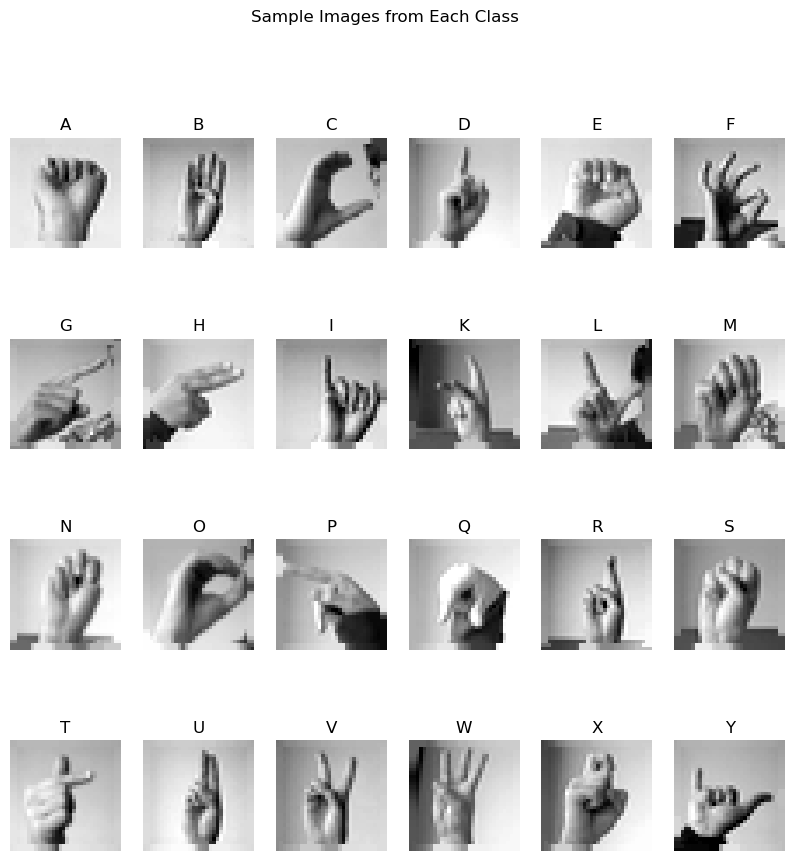

In [9]:
# Visualize sample images from each class
def visualize_samples(data, n_samples=5):
    fig, axes = plt.subplots(4, 6, figsize=(10, 10))
    fig.suptitle('Sample Images from Each Class')
    labels = data['label'].unique()
    for i, label in enumerate(sorted(labels)):
        ax = axes[i // 6, i % 6]
        sample = data[data['label'] == label].iloc[0, 1:].values
        sample_image = sample.reshape(32, 32)  # Reshaping the flattened image
        ax.imshow(sample_image, cmap='gray')
        ax.set_title(chr(label + 65))  # Converting label to corresponding letter
        ax.axis('off')
    
    plt.show()

visualize_samples(train_data)


In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [11]:
# Extract labels and image data
labels = train_data['label'].values
images = train_data.iloc[:, 1:].values

In [12]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# Normalize the data
X_train = X_train / 255.0
X_val = X_val / 255.0

# Reshape the data to fit the model input
X_train = X_train.reshape(-1, 32, 32, 1)
X_val = X_val.reshape(-1, 32, 32, 1)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)


In [19]:
# Function to create a simple CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [20]:
# Parameters
input_shape = (32, 32, 1)
num_classes = y_train.shape[1]


In [21]:
# Model 1: CNN
cnn_model = create_cnn_model(input_shape, num_classes)
cnn_history = cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10


C:\Users\divya\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2414 - loss: 2.5099 - val_accuracy: 0.8802 - val_loss: 0.5478
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6905 - loss: 0.9134 - val_accuracy: 0.9466 - val_loss: 0.2543
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7932 - loss: 0.5896 - val_accuracy: 0.9812 - val_loss: 0.1244
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8460 - loss: 0.4335 - val_accuracy: 0.9956 - val_loss: 0.0616
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8799 - loss: 0.3316 - val_accuracy: 0.9991 - val_loss: 0.0246
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8998 - loss: 0.2735 - val_accuracy: 0.9980 - val_loss: 0.0198
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9106 - loss: 0.2385 - val_accuracy: 0.9998 - val_loss: 0.0088
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9232 - loss: 0.2065 - val_accuracy: 0.9996 - val_

In [16]:
# Building a simple baseline model
baseline_model = Sequential([
    Flatten(input_shape=(32, 32, 1)),  
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  
])

# Compiling the model
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = baseline_model.fit(X_train, y_train,  validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=2)


C:\Users\divya\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
687/687 - 2s - 3ms/step - accuracy: 0.2372 - loss: 2.5010 - val_accuracy: 0.4258 - val_loss: 1.8490
Epoch 2/10
687/687 - 1s - 1ms/step - accuracy: 0.4650 - loss: 1.6587 - val_accuracy: 0.5167 - val_loss: 1.5075
Epoch 3/10
687/687 - 1s - 1ms/step - accuracy: 0.5627 - loss: 1.3484 - val_accuracy: 0.5771 - val_loss: 1.2804
Epoch 4/10
687/687 - 1s - 1ms/step - accuracy: 0.6275 - loss: 1.1342 - val_accuracy: 0.6478 - val_loss: 1.0569
Epoch 5/10
687/687 - 1s - 1ms/step - accuracy: 0.6758 - loss: 0.9823 - val_accuracy: 0.7033 - val_loss: 0.9116
Epoch 6/10
687/687 - 1s - 1ms/step - accuracy: 0.7198 - loss: 0.8468 - val_accuracy: 0.7368 - val_loss: 0.7995
Epoch 7/10
687/687 - 1s - 1ms/step - accuracy: 0.7530 - loss: 0.7499 - val_accuracy: 0.6913 - val_loss: 0.8753
Epoch 8/10
687/687 - 1s - 1ms/step - accuracy: 0.7816 - loss: 0.6589 - val_accuracy: 0.7840 - val_loss: 0.6200
Epoch 9/10
687/687 - 1s - 1ms/step - accuracy: 0.8068 - loss: 0.5883 - val_accuracy: 0.8086 - val_loss: 0.5891
E

CNN Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │         1,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,653 (940.05 KB)

 Trainable params: 80,217 (313.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,436 (626.71 KB)


Baseline Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │           825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,517 (802.80 KB)

 Trainable params: 68,505 (267.60 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 137,012 (535.21 KB)

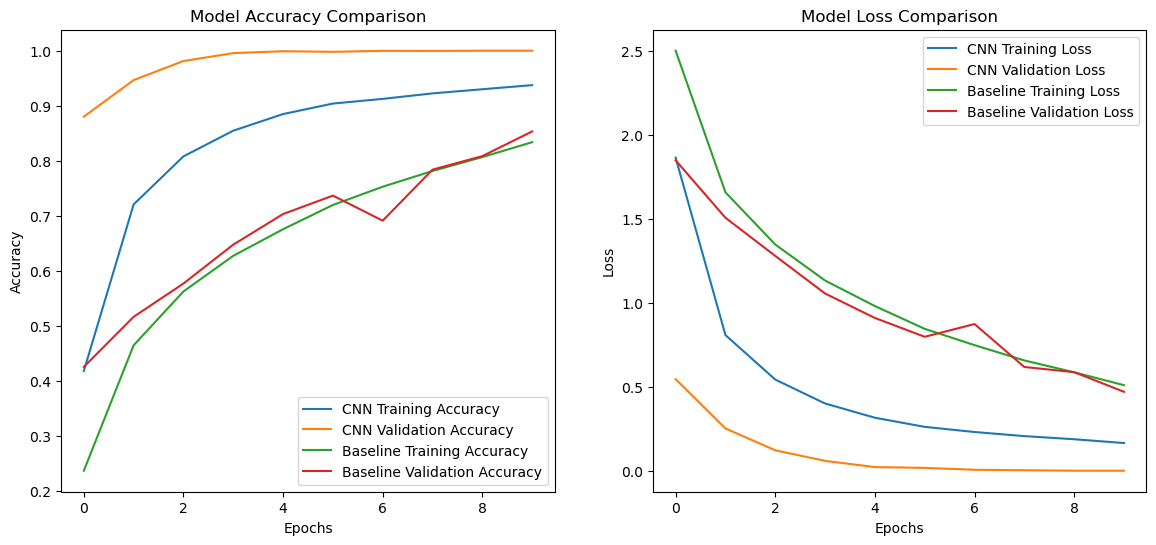

In [22]:
# Display model summaries
print("CNN Model Summary:")
cnn_model.summary()

print("\nBaseline Model Summary:")
baseline_model.summary()

# Plotting the accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(history.history['accuracy'], label='Baseline Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Baseline Validation Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the loss
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.plot(history.history['loss'], label='Baseline Training Loss')
plt.plot(history.history['val_loss'], label='Baseline Validation Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


**Optimisation of an appropriate set of models in an appropriate way**

In [27]:
def create_updated_baseline_model(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Updated Baseline Model
updated_baseline_model = create_updated_baseline_model(input_shape, num_classes)
updated_baseline_history = updated_baseline_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1562 - loss: 2.7588 - val_accuracy: 0.4309 - val_loss: 1.6768
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4760 - loss: 1.5716 - val_accuracy: 0.5105 - val_loss: 1.4473
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6230 - loss: 1.1242 - val_accuracy: 0.7113 - val_loss: 0.8619
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7204 - loss: 0.8208 - val_accuracy: 0.7720 - val_loss: 0.6964
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7918 - loss: 0.6250 - val_accuracy: 0.8354 - val_loss: 0.4883
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8504 - loss: 0.4515 - val_accuracy: 0.8547 - val_loss: 0.4139
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8801 - loss: 0.3525 - val_accuracy: 0.8632 - val_loss: 0.3830
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9043 - loss: 0.2970 - val_accuracy: 0.

In [28]:
def create_updated_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Updated CNN Model
updated_cnn_model = create_updated_cnn_model(input_shape, num_classes)
updated_cnn_history = updated_cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2292 - loss: 2.5300 - val_accuracy: 0.8709 - val_loss: 0.4102
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8527 - loss: 0.4350 - val_accuracy: 0.9865 - val_loss: 0.0608
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9414 - loss: 0.1736 - val_accuracy: 0.9984 - val_loss: 0.0118
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9700 - loss: 0.0867 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9816 - loss: 0.0591 - val_accuracy: 0.9993 - val_loss: 0.0040
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9837 - loss: 0.0452 - val_accuracy: 0.9995 - val_loss: 0.0033
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9870 - loss: 0.0399 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9881 - loss: 0.0338 - val_accuracy: 

Updated CNN Model Summary:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 484,685 (1.85 MB)

 Trainable params: 161,561 (631.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 323,124 (1.23 MB)


Updated Baseline Model Summary:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 25)             │         1,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 435,725 (1.66 MB)

 Trainable params: 145,241 (567.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 290,484 (1.11 MB)

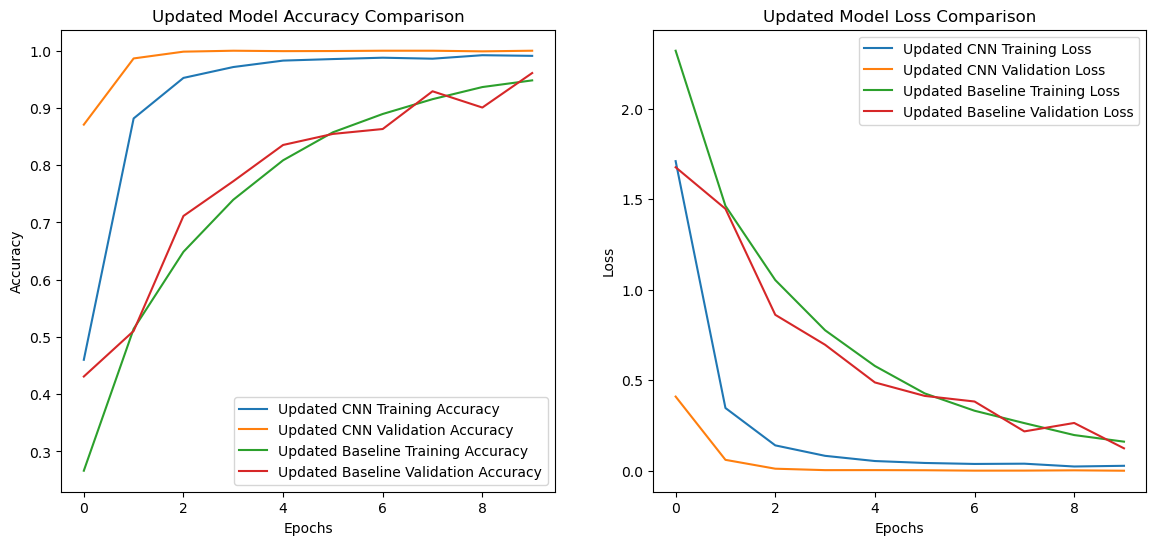

In [29]:
# Display model summaries
print("Updated CNN Model Summary:")
updated_cnn_model.summary()

print("\nUpdated Baseline Model Summary:")
updated_baseline_model.summary()

# Plotting the accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(updated_cnn_history.history['accuracy'], label='Updated CNN Training Accuracy')
plt.plot(updated_cnn_history.history['val_accuracy'], label='Updated CNN Validation Accuracy')
plt.plot(updated_baseline_history.history['accuracy'], label='Updated Baseline Training Accuracy')
plt.plot(updated_baseline_history.history['val_accuracy'], label='Updated Baseline Validation Accuracy')
plt.title('Updated Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the loss
plt.subplot(1, 2, 2)
plt.plot(updated_cnn_history.history['loss'], label='Updated CNN Training Loss')
plt.plot(updated_cnn_history.history['val_loss'], label='Updated CNN Validation Loss')
plt.plot(updated_baseline_history.history['loss'], label='Updated Baseline Training Loss')
plt.plot(updated_baseline_history.history['val_loss'], label='Updated Baseline Validation Loss')
plt.title('Updated Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


**Comparison of models, selection of the single best model and reporting of final results**

In [31]:
from tensorflow.keras.optimizers import Adam

# Define a list of learning rates to try
learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01]

# Dictionary to store results
results = {}

def create_cnn_model_with_more_layers(input_shape, num_classes, learning_rate):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Loop over each learning rate
for lr in learning_rates:
    print(f"Training model with learning rate: {lr}")
    
    # Create and train the model
    model = create_cnn_model_with_more_layers(input_shape, num_classes, lr)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=2)
    
    # Store results
    results[lr] = {
        'train_accuracy': history.history['accuracy'][-1],
        'val_accuracy': history.history['val_accuracy'][-1],
        'train_loss': history.history['loss'][-1],
        'val_loss': history.history['val_loss'][-1]
    }

# Display the results
for lr, metrics in results.items():
    print(f"Learning Rate: {lr}")
    print(f"  Final Training Accuracy: {metrics['train_accuracy']:.4f}")
    print(f"  Final Validation Accuracy: {metrics['val_accuracy']:.4f}")
    print(f"  Final Training Loss: {metrics['train_loss']:.4f}")
    print(f"  Final Validation Loss: {metrics['val_loss']:.4f}\n")


Training model with learning rate: 0.0001
Epoch 1/10
687/687 - 7s - 10ms/step - accuracy: 0.1408 - loss: 2.9085 - val_accuracy: 0.4260 - val_loss: 2.1652
Epoch 2/10
687/687 - 5s - 7ms/step - accuracy: 0.4403 - loss: 1.7908 - val_accuracy: 0.7068 - val_loss: 1.1882
Epoch 3/10
687/687 - 6s - 9ms/step - accuracy: 0.6351 - loss: 1.1336 - val_accuracy: 0.8335 - val_loss: 0.7063
Epoch 4/10
687/687 - 5s - 7ms/step - accuracy: 0.7485 - loss: 0.7798 - val_accuracy: 0.8851 - val_loss: 0.4662
Epoch 5/10
687/687 - 7s - 10ms/step - accuracy: 0.8188 - loss: 0.5644 - val_accuracy: 0.9257 - val_loss: 0.3106
Epoch 6/10
687/687 - 7s - 10ms/step - accuracy: 0.8669 - loss: 0.4139 - val_accuracy: 0.9570 - val_loss: 0.2108
Epoch 7/10
687/687 - 7s - 10ms/step - accuracy: 0.9003 - loss: 0.3149 - val_accuracy: 0.9694 - val_loss: 0.1515
Epoch 8/10
687/687 - 7s - 10ms/step - accuracy: 0.9234 - loss: 0.2460 - val_accuracy: 0.9838 - val_loss: 0.1026
Epoch 9/10
687/687 - 6s - 8ms/step - accuracy: 0.9433 - loss: 0.1

Epoch 1/10
687/687 - 6s - 9ms/step - accuracy: 0.4664 - loss: 1.7146 - val_accuracy: 0.8953 - val_loss: 0.4018
Epoch 2/10
687/687 - 4s - 6ms/step - accuracy: 0.8817 - loss: 0.3558 - val_accuracy: 0.9807 - val_loss: 0.0884
Epoch 3/10
687/687 - 5s - 7ms/step - accuracy: 0.9556 - loss: 0.1391 - val_accuracy: 0.9965 - val_loss: 0.0293
Epoch 4/10
687/687 - 4s - 6ms/step - accuracy: 0.9780 - loss: 0.0719 - val_accuracy: 0.9998 - val_loss: 0.0057
Epoch 5/10
687/687 - 6s - 8ms/step - accuracy: 0.9889 - loss: 0.0399 - val_accuracy: 0.9987 - val_loss: 0.0084
Epoch 6/10
687/687 - 7s - 10ms/step - accuracy: 0.9901 - loss: 0.0322 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/10
687/687 - 6s - 9ms/step - accuracy: 0.9922 - loss: 0.0280 - val_accuracy: 1.0000 - val_loss: 9.3286e-04
Epoch 8/10
687/687 - 6s - 9ms/step - accuracy: 0.9919 - loss: 0.0271 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 9/10
687/687 - 6s - 9ms/step - accuracy: 0.9957 - loss: 0.0161 - val_accuracy: 1.0000 - val_loss: 6.6

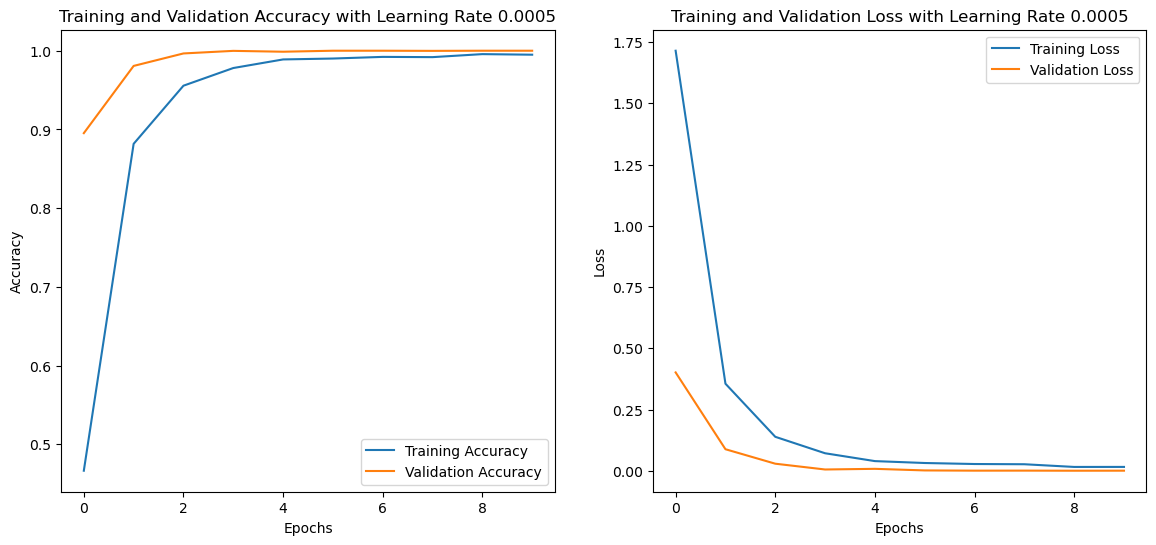

In [32]:
# Train the model again with the best learning rate
best_lr = 0.0005

best_model = create_cnn_model_with_more_layers(input_shape, num_classes, best_lr)
best_history = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=2)

# Plotting the accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy with Learning Rate 0.0005')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the loss
plt.subplot(1, 2, 2)
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with Learning Rate 0.0005')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [33]:
# Extract labels and image data from test data
test_labels = test_data['label'].values
test_images = test_data.iloc[:, 1:].values

# Normalize and reshape the test data
X_test = test_images / 255.0
X_test = X_test.reshape(-1, 32, 32, 1)

# One-hot encode the labels
y_test = to_categorical(test_labels)


In [34]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Convert predictions from one-hot encoding to label indices
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = test_labels


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [35]:
import numpy as np

# Initialize a dictionary to store accuracy for each alphabet
alphabet_accuracies = {}

# Calculate accuracy for each class (alphabet)
for i in range(num_classes):
    class_indices = np.where(y_true_classes == i)[0]
    class_accuracy = np.mean(y_pred_classes[class_indices] == y_true_classes[class_indices])
    alphabet_accuracies[chr(i + 65)] = class_accuracy

# Print each alphabet's accuracy
for letter, accuracy in alphabet_accuracies.items():
    print(f"Accuracy for {letter}: {accuracy:.4f}")


Accuracy for A: 1.0000
Accuracy for B: 0.9653
Accuracy for C: 0.9968
Accuracy for D: 0.9306
Accuracy for E: 1.0000
Accuracy for F: 1.0000
Accuracy for G: 0.7960
Accuracy for H: 1.0000
Accuracy for I: 0.9965
Accuracy for J: nan
Accuracy for K: 0.9366
Accuracy for L: 1.0000
Accuracy for M: 0.9239
Accuracy for N: 0.9003
Accuracy for O: 0.9919
Accuracy for P: 1.0000
Accuracy for Q: 1.0000
Accuracy for R: 0.4653
Accuracy for S: 0.9350
Accuracy for T: 0.7419
Accuracy for U: 1.0000
Accuracy for V: 0.9942
Accuracy for W: 1.0000
Accuracy for X: 0.9963
Accuracy for Y: 0.9428


C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [36]:
# Find the highest and lowest accuracy
highest_accuracy_letter = max(alphabet_accuracies, key=alphabet_accuracies.get)
lowest_accuracy_letter = min(alphabet_accuracies, key=alphabet_accuracies.get)

print(f"\nHighest accuracy: {highest_accuracy_letter} with {alphabet_accuracies[highest_accuracy_letter]:.4f}")
print(f"Lowest accuracy: {lowest_accuracy_letter} with {alphabet_accuracies[lowest_accuracy_letter]:.4f}")



Highest accuracy: A with 1.0000
Lowest accuracy: R with 0.4653


In [37]:
# Calculate overall accuracy
overall_accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Overall Accuracy: {overall_accuracy:.4f}")

Overall Accuracy: 0.9490


step1 - I started with building my nase models(baseline_model and cnn_model) where i used 2 layers each.

step2 - Then added more layers to it to see whether the models accuracy increases(which hopefully increaded looking at their progress in trainings)

**These two steps were taken under constraint that we have to use less than 500,000 params.**

step3 - Thought if I could play around with Learning Rates and see if my accuracy would increase. This idea had a success and i got 99% accuracy on my traing set. This is my best model so far, and i choosed this model to be my best model. 

Best model is tested on our test set and got 94% of accuracy, where, 
Highest accuracy: A with 1.000 and 
Lowest accuracy: R with 0.4653 